# EDA BASELINE

This notebook will be a baseline for EDA for my next competitions with tabular data. \
I will also make similar baseline for Text and Image data.

## IMPORTS

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport
import gc
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os

## CONFIG

In [2]:
config = {
    "TRAIN_PATH" : "D:/Documents/GitHub/nlp-pipeline/data/tweet_disaster/train.csv",
    "TEST_PATH" : "D:/Documents/GitHub/nlp-pipeline/data/tweet_disaster/test.csv",
    "TEXT_VAR" : "text",
    "TARGET_VAR" : "target",
}

## LOADING DATA

In [23]:
df_train = pd.read_csv(config["TRAIN_PATH"])
df_test = pd.read_csv(config["TEST_PATH"])

### TRAIN AND TEST SET OVERVIEW

Check dataset size, test set size, number of null values etc...

In [4]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


Describe give you an overview of your continuous variables, check the different distributions, do they differ in the test set ?

In [8]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [9]:
df_test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


### TARGET VARIABLE

Let's take a look at the target variable

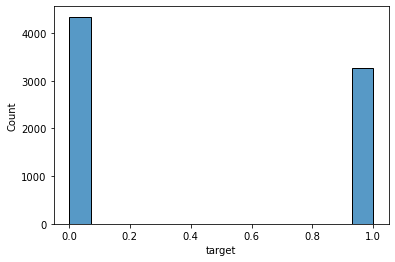

In [10]:
ax = sns.histplot(x=config["TARGET_VAR"], data=df_train)

### MISSING VALUES

In [11]:
def missing_zero_values_table(df): #Function to access missing and zero values in your dataset
        zero_val = (df == 0.00).astype(int).sum(axis=0) #Number of zeros in the dataset
        mis_val = df.isnull().sum() #Number of missing values in the dataset
        mis_val_percent = 100 * df.isnull().sum() / len(df) #percent missing values
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'}) #Create missing value table
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [12]:
missing_zero_values_table(df_train)

Your selected dataframe has 5 columns and 7613 Rows.
There are 2 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
location,0,2533,33.3,2533,33.3,object
keyword,0,61,0.8,61,0.8,object


In [13]:
missing_zero_values_table(df_test)

Your selected dataframe has 4 columns and 3263 Rows.
There are 2 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
location,0,1105,33.9,1105,33.9,object
keyword,0,26,0.8,26,0.8,object


### PANDAS PROFILING

We use pandas profiling to rapidly get many useful information about our dataset and it's features.

In [14]:
profile_train = ProfileReport(df_train, title='Pandas Train Profiling Report', html={'style':{'full_width':True}})

In [15]:
profile_train

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


In [16]:
profile_test = ProfileReport(df_test, title='Pandas Train Profiling Report', html={'style':{'full_width':True}})

In [17]:
profile_test

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]


# TEXT DATA EDA

### IMPORTS

In [18]:
import os
import re
import emoji
import string

#Transforming words to tokens - Useful for Ngrams and preprocess for modelling
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Nltk for tokenize and stopwords
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

### UTILS

In [19]:
def find_url(string): 
    text = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',string)
    return "".join(text) # converting return value from list to string

def delete_url(string, replace = ''): 
    url = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url.sub(r''+ replace,string)

def find_emoji(string):
    emo_text=emoji.demojize(string)
    line=re.findall(r'\:(.*?)\:', emo_text)
    return line

def delete_emoji(string, replace = ''):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'' + replace, string)

def find_email(string):
    line = re.findall(r'[\w\.-]+@[\w\.-]+',str(string))
    return ",".join(line)

def delete_email(string, replace = ''):
    email = re.compile(r'[\w\.-]+@[\w\.-]+')
    return email.sub(r''+ replace,string)

def find_hash(string):
    line=re.findall(r'(?<=#)\w+',string)
    return " ".join(line)

def delete_hash(string, replace = ''):
    hash = re.compile(r'(?<=#)\w+')
    return hash.sub(r'' + replace, string)

def find_at(string):
    line=re.findall(r'(?<=@)\w+',string)
    return " ".join(line)

def delete_at(string, replace = ''):
    at = re.compile(r'(?<=@)\w+')
    return at.sub(r'' + replace, string)

def find_number(string):
    line=re.findall(r'[0-9]+',string)
    return " ".join(line)

def delete_number(string, replace = ''):
    number = re.compile(r'[0-9]+')
    return number.sub(r'' + replace, string)

def find_punct(text):
    line = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', text)
    string="".join(line)
    return list(string)

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

def stop_word_fn(text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    non_stop_words = [w for w in word_tokens if not w in stop_words] 
    stop_words= [w for w in word_tokens if w in stop_words] 
    return stop_words

def stopword_strip(text):
    '''
    a function for removing the stopword
    '''
    stop_words = set(stopwords.words('english')) 
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

## DATA CLEANING

In [26]:
# text preprocessing helper functions

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [38]:
# Applying the cleaning function to both test and training datasets
df_train["clean_text"] = df_train[config["TEXT_VAR"]].apply(str).apply(lambda x: text_preprocessing(x))
df_test["clean_text"] = df_test[config["TEXT_VAR"]].apply(str).apply(lambda x: text_preprocessing(x))
df_train.head()

,id,keyword,location,text,target,word_count,char_count,word_density,punc_count,punc_word_ratio,clean_text
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,13,56,0.228070,0,0.0,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,forest fire near la ronge sask canada,1,7,31,0.218750,0,0.0,forest fire near la ronge sask canada
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,22,109,0.200000,0,0.0,all residents asked to shelter in place are be...
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1,7,50,0.137255,0,0.0,people receive wildfires evacuation orders in ...
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,16,70,0.225352,0,0.0,just got sent this photo from ruby alaska as s...


### WORD, CHARACTER & PUNC COUNT

In [28]:
punc = string.punctuation
df_train['word_count'] = df_train[config["TEXT_VAR"]].apply(lambda x : len(x.split()))
df_train['char_count'] = df_train[config["TEXT_VAR"]].apply(lambda x : len(x.replace(" ","")))
df_train['word_density'] = df_train['word_count'] / (df_train['char_count'] + 1)
df_train['punc_count'] = df_train[config["TEXT_VAR"]].apply(lambda x : len([a for a in x if a in punc]))
df_train["punc_word_ratio"] = df_train["punc_count"] / df_train["word_count"]
df_train[['word_count', 'char_count', 'word_density', 'punc_count', 'punc_word_ratio']].head(10)

,word_count,char_count,word_density,punc_count,punc_word_ratio
0,13,56,0.228070,0,0.0
1,7,31,0.218750,0,0.0
2,22,109,0.200000,0,0.0
3,7,50,0.137255,0,0.0
4,16,70,0.225352,0,0.0
5,15,84,0.176471,0,0.0
6,14,79,0.175000,0,0.0
7,15,41,0.357143,0,0.0
8,12,67,0.176471,0,0.0
9,10,39,0.250000,0,0.0


C:\Anaconda\envs\Torch-37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\envs\Torch-37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\envs\Torch-37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

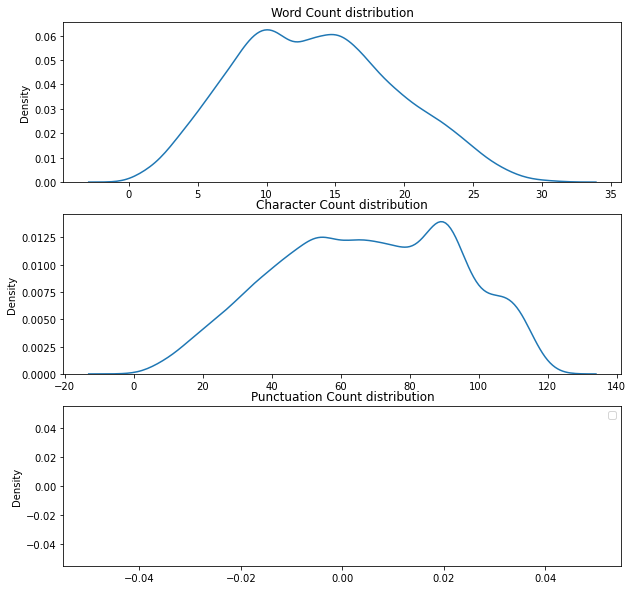

In [29]:
f, axes = plt.subplots(figsize=(10, 10))
sns.despine(left=True)

ax1 = plt.subplot(311)
ax1.set_title("Word Count distribution")
sns.distplot(df_train[["word_count"]], hist=False, label = "df_train")

ax2 = plt.subplot(312)
ax2.set_title("Character Count distribution")
sns.distplot(df_train[["char_count"]], hist=False, label = "target_neg")

ax3 = plt.subplot(313)
ax3.set_title("Punctuation Count distribution")
sns.distplot(df_train[["punc_count"]], hist=False, label = "target_neg")

plt.legend()
plt.show()

## N-GRAMS

In [31]:
def ngrams_top(corpus,ngram_range,n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english',ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    total_list = words_freq[:n]
    df = pd.DataFrame(total_list, columns=['text','count'])
    return df

### 1-GRAMS

In [32]:
ngrams_top(df_train[config["TEXT_VAR"]], (1,1), n = 10)

,text,count
0,like,344
1,just,318
2,amp,298
3,im,295
4,new,225
5,people,196
6,dont,189
7,news,185
8,video,158
9,emergency,156


### 2-GRAMS

In [34]:
ngrams_top(df_train[config["TEXT_VAR"]], (2,2), n=10)

,text,count
0,suicide bomber,59
1,burning buildings,58
2,youtube video,43
3,liked youtube,42
4,northern california,41
5,cross body,39
6,oil spill,39
7,california wildfire,34
8,looks like,33
9,suicide bombing,33


Text(0.5, 1.0, 'word cloud')

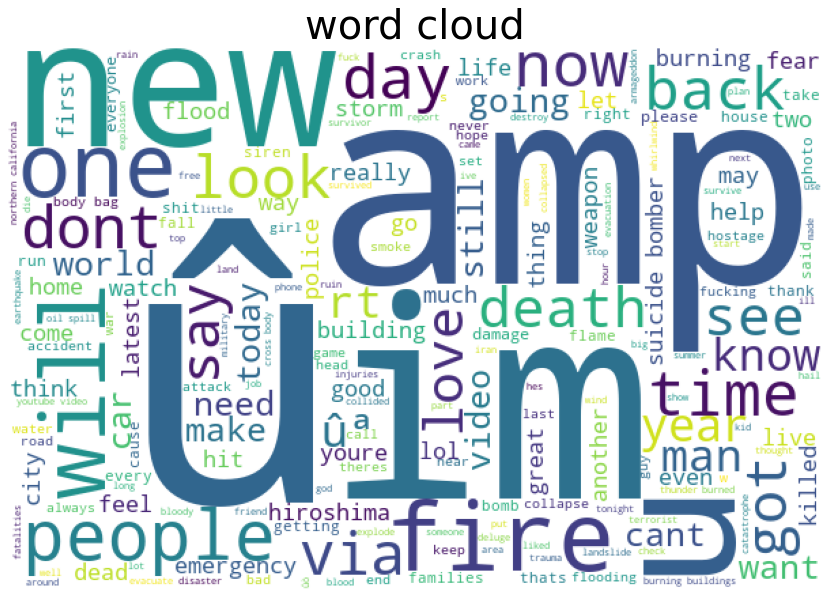

In [37]:
from wordcloud import WordCloud
fig, ax = plt.subplots(1, 1, figsize=[20, 10])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(df_train[config["TEXT_VAR"]]))
ax.imshow(wordcloud1)
ax.axis('off')
ax.set_title('word cloud',fontsize=40)